In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [12]:
df = pd.DataFrame({'C1-C3': [24.2,24.2,24.0], 
                   'C4-C6': [25.2,24.7,25.0], 
                   'C7-C9': [26.3, 26.0, 25.8],
                   'C10-C12': [27.2, 27.2, 27.1],
                   'C13-C15': [28.2, 28.3, None],
                   'C16-C18': [28.6, 29.0, 29.4],
                   'C19-C21': [30.1, 30.7, 31.3],
                }).T.rename(columns={0: 'Ct1', 1: 'Ct2', 2:'Ct3'})

df['DNAconc'] = np.array([0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125])

df['logconc'] = np.log10(df['DNAconc'])

df['AvgCt'] = round(df.iloc[:, 0: 3].mean(axis=1), 3)

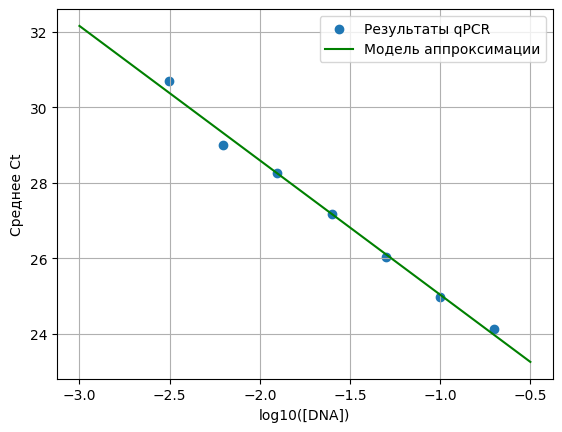

In [21]:
model = curve_fit(lambda x, y, z: x * y + z, df['logconc'], df['AvgCt'])

xi = np.array([-0.5,-3])
tan = model[0][0]
yi = tan * xi + model[0][1]

plt.scatter(df['logconc'], df['AvgCt'])
plt.plot(xi, yi, 'green')
plt.xlabel('log10([DNA])')
plt.ylabel('Среднее Ct')
plt.grid()
plt.legend(['Результаты qPCR', 'Модель аппроксимации'])
plt.show()

In [25]:
print(f'd/dx f(x) = {tan}')

eff = (10 ** (-1 / tan)) - 1

print(f'Эффективность праймеров: {round(eff * 100, 2)}%')

df['DeltaCt^2'] = (df['AvgCt'] - (tan * df['logconc'] + model[0][1])) ** 2

e = 10 ** (-1 / eff)

logsqrsum = np.sum(df.logconc ** 2)

deltactsum = np.sum(df['DeltaCt^2'])

logsum = np.sum(df['logconc'])

Sa2 = (deltactsum * logsqrsum) / (len(df['AvgCt']) * logsqrsum - (logsum ** 2))
Sa = np.sqrt(Sa2)

print (Sa)

SE = e *  np.log(10) * tan ** -2 * Sa

print(f'SE(E) = {SE}')

d/dx f(x) = -3.557310430743373
Эффективность праймеров: 91.03%
0.522463747333722
SE(E) = 0.007577758380781096
